In [1]:
import pandas as pd

## Reading the csv file 
interactions = pd.read_csv('customer_interactions.csv')
interactions.head()

,spend,interactions
0,5818,23
1,6255,15
2,6139,15
3,6070,19
4,4837,24


In [2]:
## Computing z-scores
interactions['z_spend'] = (interactions['spend'] - interactions['spend'].mean())/ interactions['spend'].std()
interactions['z_interactions'] = (interactions['interactions'] - interactions['interactions'].mean())/ interactions['interactions'].std()
interactions.head()

,spend,interactions,z_spend,z_interactions
0,5818,23,0.923351,0.647282
1,6255,15,1.145958,-0.809740
2,6139,15,1.086868,-0.809740
3,6070,19,1.051719,-0.081229
4,4837,24,0.423632,0.829410


In [3]:
from sklearn.cluster import KMeans

## Defining the model
four_clusters = KMeans(n_clusters = 4, n_init = 20)

## Applying k-means to the data 
interactions_clusters = four_clusters.fit(interactions[['z_spend', 'z_interactions']])

## Appending cluster number
interactions['cluster'] = interactions_clusters.labels_
interactions.head()

,spend,interactions,z_spend,z_interactions,cluster
0,5818,23,0.923351,0.647282,1
1,6255,15,1.145958,-0.809740,2
2,6139,15,1.086868,-0.809740,2
3,6070,19,1.051719,-0.081229,2
4,4837,24,0.423632,0.829410,1


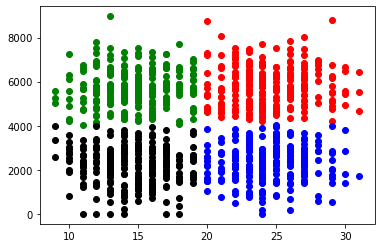

In [4]:
import matplotlib.pyplot as plt

## Visualizing data with cluster 
colors = ['black', 'red', 'green', 'blue']

for c in interactions['cluster'].unique():
    temp = interactions[interactions.cluster == c]
    plt.scatter(temp['interactions'], temp['spend'], color = colors[c])

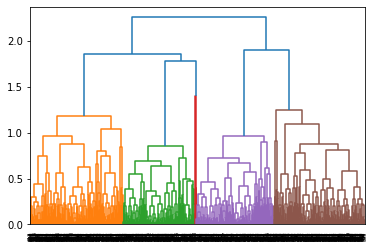

In [5]:
## Importing hierachical clustering 
import scipy.cluster.hierarchy as sch

dend = sch.dendrogram(sch.linkage(interactions[['z_spend', 'z_interactions']], 
                                  method = 'average'))
plt.show()